### PROBLEM 1 - Roots of the polinomial

In [1]:
import numpy as np
from pylab import *
from math import *

In [2]:
def polinomio(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def der_polinomio(x):
    return 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

xs = np.arange(0, 1, 0.01)
ps = []

for value in xs:
    ps.append(polinomio(value))

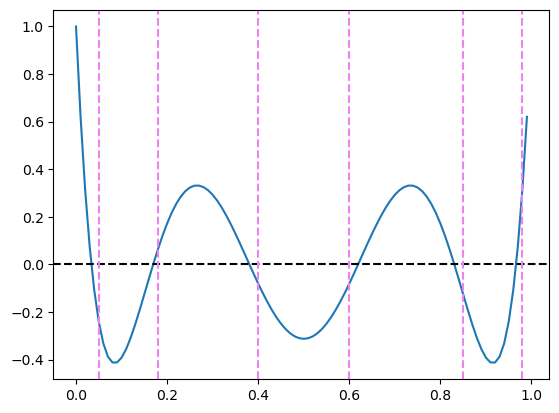

In [3]:
plt.plot(xs, ps)
plt.axhline(y=0, c='black', linestyle='--')

plt.axvline(x=0.05, c='violet', linestyle='--')
plt.axvline(x=0.18, c='violet', linestyle='--')
plt.axvline(x=0.40, c='violet', linestyle='--')
plt.axvline(x=0.60, c='violet', linestyle='--')
plt.axvline(x=0.85, c='violet', linestyle='--')
plt.axvline(x=0.98, c='violet', linestyle='--')

Alternative **a)** Just by looking at the graph we can estimate values close to the roots **0.05; 0.18; 0.40; 0.60; 0.85 and 0.98**

Alternative **b)** To calculate the real values we use the Newton's method with 10 decimal places:

In [4]:
def root(x):
    accuracy = 1e-10
    delta = 1.0

    while delta > accuracy:
        delta = polinomio(x)/der_polinomio(x)
        x -= delta
    return x

estimate = [0.05, 0.18, 0.40, 0.60, 0.85, 0.98]
all_roots = []

for value in estimate:
    all_roots.append(root(value))

In [5]:
print(f'roots: {all_roots}')

roots: [0.03337764323847266, 0.16939497925675384, 0.3806902324811746, 0.619917734535667, 0.8306046932331075, 0.9662347571015679]


### PROBLEM 2 - The Lagrange's point

Alternative **a)** Demonstration of the equation [...]

$$ \frac{GM}{r^{2}} - \frac{Gm}{(R-r)^{2}} = w^{2}r \tag{1} $$

Alternative **b)** Rearranging the terms of the equation **(1)** we can obtain the **quintic equation**:

$$ GM(R-r)^{2}-Gmr^{2} = w^{2}r^{3}(R-r)^{2} $$

$$ -w^{2}r^{5} + 2w^{2}Rr^{4} - R^{2}w^{2}r^{3} + (M-m)Gr^{2} - 2GMRr + GMR^{2} = 0$$

Parameter assignment and equation

In [6]:
G, M, m = 6.674e-11, 5.974e24, 7.348e22
R, w = 3.844e8, 2.662e-6

def quintic(G, M, m, R, w, r):
    return -(w**2)*(r**5) + 2*(w**2)*R*(r**4) - (R**2)*(w**2)*(r**3) + (M-m)*G*(r**2) - 2*G*M*R*r + G*M*(R**2)

def der_quintic(G, M, m, R, w, r):
    return -5*(w**2)*(r**4) + 8*(w**2)*R*(r**3) - 3*(R**2)*(w**2)*(r**2) + 2*(M-m)*G*r - 2*G*M*R

Using the Newton's method, taking the distance (2/3)R as a guess:

In [55]:
L_guess = (2/3)*R

accuracy = 1e-4
delta = 1.0

while delta > accuracy:
    delta = quintic(G, M, m, R, w, L_guess)/der_quintic(G, M, m, R, w, L_guess)
    L_guess -= delta

In [56]:
print(f'L1 = {L_guess/1e8} +e8 m')

L1 = 3.002235617571727 +e8 m


To plot the graph we will construct a list of all distances and calculate the value of quintic equation for all of them

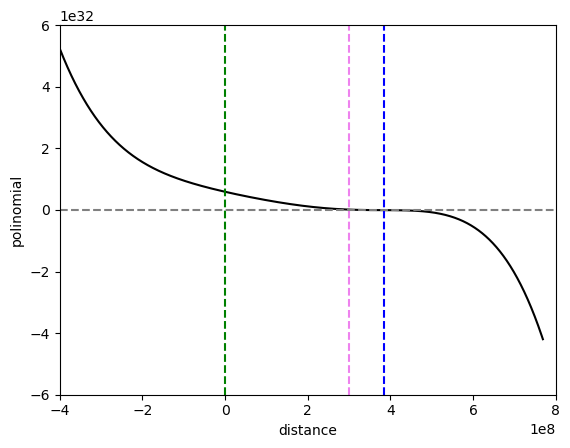

In [59]:
rs = np.arange(-2*R, 2*R, 100)
ls = []

for value in rs:
    ls.append(quintic(G, M, m, R, w, value))

plt.plot(rs, ls, c='k', linestyle='-')
plt.axvline(x = L_guess, c='violet', linestyle='--')
plt.axvline(x = 0, c='green', linestyle='--')
plt.axvline(x = R, c='blue', linestyle='--')

plt.axhline(y = 0, c='gray', linestyle='--')

plt.xlim(-4e8, 8e8)
plt.ylim(-0.6e33, 0.6e33)
plt.xlabel('distance')
plt.ylabel('polinomial')

plt.show()

The **green line is the Earth's position** at x = 0, the **blue line indicate the moon** and the **pink line the $L_{1}$ point**

We can see that if we use (2/3)R ~ $2.5*10^{8}m$ as a guess the code give to us $L_{1}$ ~ $3.0 * 10^{8}m$ as the true distance

In the image we can note that quitic equation have a root in pink line, collaborating with our result

### PROBLEM 3 - The temperature of a light bulb